<a href="https://colab.research.google.com/github/arafatro/MachineLearning/blob/master/KNNLazy/KNN_LazyLearner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-nearest neighbors (KNN)
KNN is a simple, supervised machine learning (ML) algorithm that can be used for classification or regression tasks - and is also frequently used in missing value imputation. It is based on the idea that the observations closest to a given data point are the most "similar" observations in a data set, and we can therefore classify unforeseen points based on the values of the closest existing points. By choosing K, the user can select the number of nearby observations to use in the algorithm.


### In this notebook, we will go through two examples on how to use the class KNN. We will first apply it on a toy example using our own generated data. Then, we will use the class to classify cancer by predicting if it is malignant or benign.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN classifier
# Note: KNN is a lazy learner because it stores the training data and performs no model training.
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model with training data (KNN simply stores the data)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 1.0


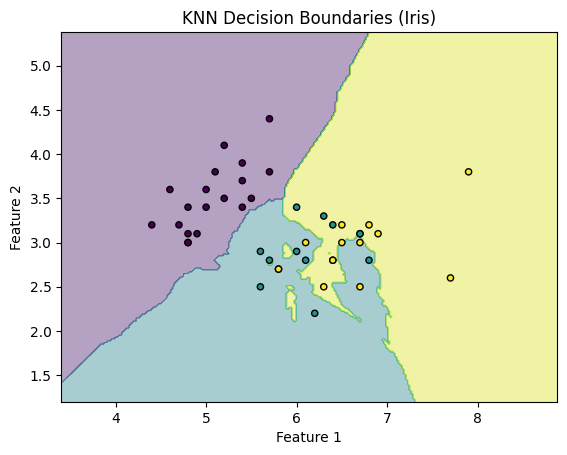

In [4]:
# Visualize decision boundaries (for two features only, for demonstration)
# Selecting the first two features for easy visualization
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# For visualization, we use only the first two features
plot_decision_boundaries(X_test[:, :2], y_test, KNeighborsClassifier(n_neighbors=5).fit(X_train[:, :2], y_train), "KNN Decision Boundaries (Iris)")

Why KNN Is a Lazy Learner - Interpreting the Image:

1. **List Complex and Irregular Decision Boundaries**

The image shows very non-linear and jagged decision boundaries. This happens because:

* KNN does not learn a general model during training.

* Instead, it memorizes the training data and uses it at prediction time to compute distances to all stored points.

* These sharp, intricate boundaries are formed by comparing test points to local neighbors during classification, rather than using a smooth, pre-fit function.

2. **No Model Training**

The KNN algorithm doesn't build a model or abstract patterns from the data ahead of time. This is evident from:

* How boundaries tightly follow the distribution of individual training points.

* A learner that had trained on the data (like logistic regression or SVM) would produce smoother and more generalized boundaries.

3. **Decisions Based Solely on Local Information**

In the image, some tiny isolated areas of different color appear within a larger region. These are caused by individual or very few nearby points:

* KNN decides based on the majority class of nearby points, without a global understanding of the data.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

SEED = 42

# Example I - Toy example with randomly generated data
In this example, we generate data from six different multivariate guassian distributions, all with the same covariance structure. Then, we use KNN to classify three arbitrary points.

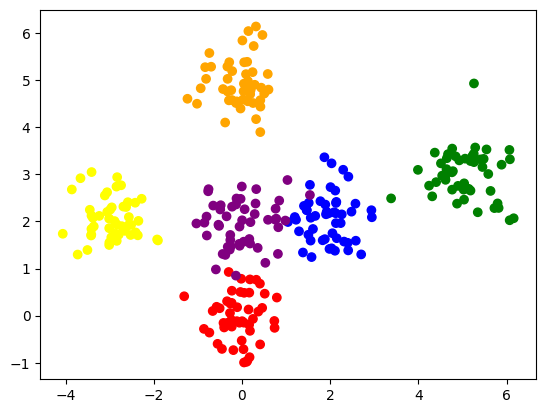

In [11]:
# Generate data from 6 multivariate normal distributions
n = 50
mu = [[0, 0], [2,2], [5,3], [-3, 2], [0,2], [0, 5]]

# Set seed for reproducibility
np.random.seed(SEED)

# Concatenate all data
data = np.concatenate((np.random.randn(n,2)/2 + mu[0], np.random.randn(n,2)/2 + mu[1]))
for i in range(2,6):
    data = np.concatenate((data, np.random.randn(n,2)/2 + mu[i]))

labels = np.repeat([i for i in range(6)], n)

colors = np.array(['red', 'blue', 'green', 'yellow', 'purple', 'orange'])
plt.scatter(data[:,0], data[:,1], c=colors[labels])

In [13]:
# Append labels to satisfy the format-requirement of the class KNN
data = np.append(data, np.reshape(labels, (labels.shape[0],1)), axis=1)

# Create a model
# Use KNeighborsClassifier instead of KNN
model = KNeighborsClassifier(n_neighbors=5) # Changed KNN to KNeighborsClassifier
model.fit(data[:, :2], data[:, 2]) # Fit the model with the data and labels

# Generate new points
new_points = np.random.randn(3,2)*3

# Predict labels on new points
predictions = model.predict(new_points)
print(predictions)

[0. 1. 5.]


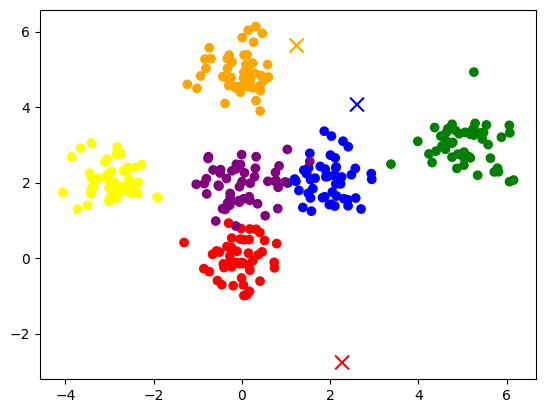

In [14]:
# Plot the predictions together with the data
predicted_col = [colors[int(prediction)] for prediction in predictions]
plt.scatter(data[:,0], data[:,1], c=colors[labels])
plt.scatter(new_points[:,0], new_points[:,1], c=predicted_col, marker='x', s=100)

We see that the classifications (illustrated as crosses) are reasonable and what we would expect from the KNN algorithm.

# Example II
In this example we use the class KNN to predict if cancer is malignant or benign. We perform hyper-parameter optimization using Leave One Out Cross-Validation (LOOCV). Then, we train a final model and test it on test data.

In [15]:
# Load data
all_data = load_breast_cancer()

In [16]:
print(f"We have {len(all_data['feature_names'])} recorded features.")
print(all_data['feature_names'])

We have 30 recorded features.
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [17]:
print(f"We have {np.sum(np.isnan(data))} missing values.")

We have 0 missing values.


We see that we have 30 recorded features with no missing values. We continue by standardizing the values. Then we proceed with finding the optimal value of k by using LOOCV. We try every odd k from 3 to 19.

In [18]:
# Extract features (X) and labels (y)
X = all_data['data']
y = all_data['target']
# Standardize
X_std = (X - np.mean(X,axis=0)) / np.std(X, axis=0)

In [19]:
# Split all data into training data (85%) and test data (15%)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=int(X_std.shape[0]*0.15), random_state=SEED)

In [25]:
# Try every odd k from 3 to 19
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
cv_error_all_k = []
for k in range(3, 20, 2):
    # We calculate the average missclassification rate, we let that represent the cross-validation error
    cv_error = np.ones(X_train.shape[0])
    for i in range(X_train.shape[0]):
        train_data = np.append(np.delete(X_train,i,axis=0), np.reshape(np.delete(y_train,i), (X_train.shape[0]-1,1)), axis=1)
        # Instantiate KNN with the desired k value then fit to the data
        model = KNN(n_neighbors=k)  # Pass k to n_neighbors parameter
        model.fit(train_data[:, :-1], train_data[:, -1].astype(int))  # Fit the model to features and target
        cv_error[i] = (model.predict(np.reshape(X_train[i,:], (1, X_train[i,:].shape[0]))) != y_train[i])
    cv_error_all_k.append(np.sum(cv_error)/len(cv_error))

Streaming output truncated to the last 5000 lines.
<ipython-input-25-03a3a7ef03d7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv_error[i] = (model.predict(np.reshape(X_train[i,:], (1, X_train[i,:].shape[0]))) != y_train[i])
<ipython-input-25-03a3a7ef03d7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cv_error[i] = (model.predict(np.reshape(X_train[i,:], (1, X_train[i,:].shape[0]))) != y_train[i])
<ipython-input-25-03a3a7ef03d7>:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (De

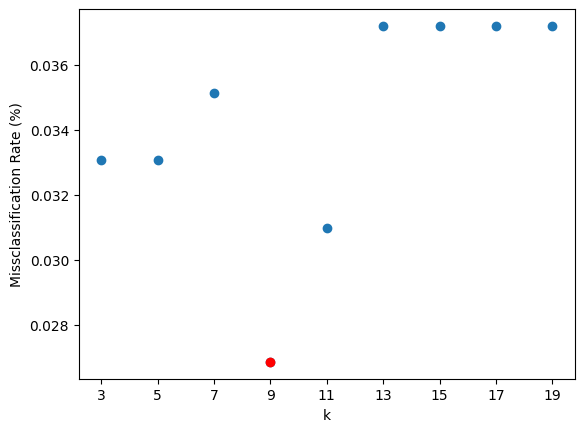

In [26]:
# Plot the missclassification rate for each k
plt.scatter(range(3, 20, 2), cv_error_all_k)
plt.xticks(range(3, 20, 2))
plt.xlabel("k")
plt.ylabel("Missclassification Rate (%)")

# Mark the lowest k as red
plt.scatter(3 + np.argmin(cv_error_all_k)*2, np.min(cv_error_all_k), c='red')

We see that we had the lowest missclassifcation rate with k=9. Now, we train a model with k=13 and test it on the test data. We evaluate the final model using a confusion matrix.

In [28]:
# Now we test our model with k=9 on the test data

# Train final model
# Use n_neighbors instead of k
final_model = KNN(n_neighbors=9) # Changed k to n_neighbors
final_model.fit(X_train, y_train) # Fit the model with training data

# Predict on test data
predictions = final_model.predict(X_test)

# Calculate accuracy
accuracy = np.sum(predictions==y_test)/len(y_test)
print(f"The final model has an accuracy of: {accuracy*100:.2f}%")

The final model has an accuracy of: 95.29%


In [29]:
# A function for printing a confusion matrix
def print_confusion_matrix(true, predictions):
    print("                   TRUE")
    print("                  1     0")
    print("---------------------------")
    print(f"Predicted   1|   {sum(y_test[predictions==1]==1)}     {sum(y_test[predictions==1]==0)}")
    print(f"            0|   {sum(y_test[predictions==0]==1)}     {sum(y_test[predictions==0]==0)}")

In [30]:
print_confusion_matrix(y_test, predictions)

                   TRUE
                  1     0
---------------------------
Predicted   1|   52     2
            0|   2     29


# Introduction to KNN and Lazy Learning
K-Nearest Neighbors (KNN) is a simple, instance-based supervised learning algorithm. It is called a "lazy learner" because:

* No Explicit Training Phase: KNN does not build a model during training. It memorizes the entire training dataset.

* Computation at Prediction Time: All calculations (e.g., distance computation, neighbor selection) happen when making predictions, which can be slow for large datasets.

**Example:** Imagine a librarian who doesn’t organize books by genre but instead memorizes every book’s location. When a customer asks for a recommendation, the librarian quickly checks nearby books to suggest similar ones. The "work" happens only when the query is made.

# Load and Explore Dataset
We’ll generate a synthetic dataset using make_blobs for simplicity and visualization.

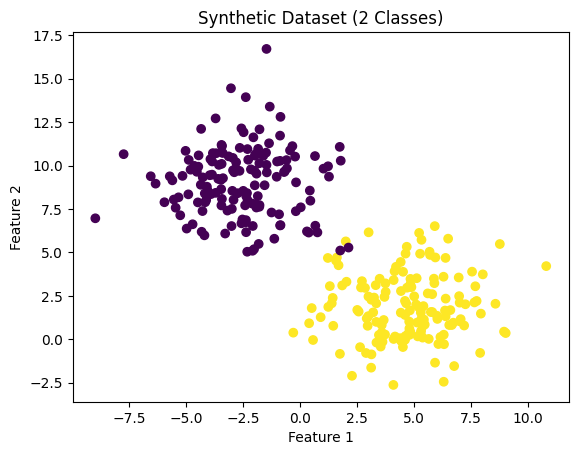

In [31]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=42, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Dataset (2 Classes)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Data Preprocessing
Normalize features to ensure equal weighting in distance calculations.

In [32]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Implement KNN from Scratch
**Key Steps:**
1. Calculate Distances (Euclidean).

2. Find k-Nearest Neighbors.

3. Predict by Majority Vote.

In [33]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def knn_predict(X_train, y_train, x_test, k=3):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_labels = y_train[k_indices]
    return np.bincount(k_labels).argmax()

# Test the implementation
y_pred_scratch = [knn_predict(X_train, y_train, x, k=5) for x in X_test]
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print(f"From-Scratch KNN Accuracy: {accuracy_scratch:.2f}")

From-Scratch KNN Accuracy: 0.98


# Compare with Scikit-Learn’s KNN

In [34]:
# Train scikit-learn's KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_sklearn = knn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Scikit-Learn KNN Accuracy: {accuracy_sklearn:.2f}")

Scikit-Learn KNN Accuracy: 0.98


# Visualize Decision Boundaries
Visualize how KNN classifies regions in the feature space.

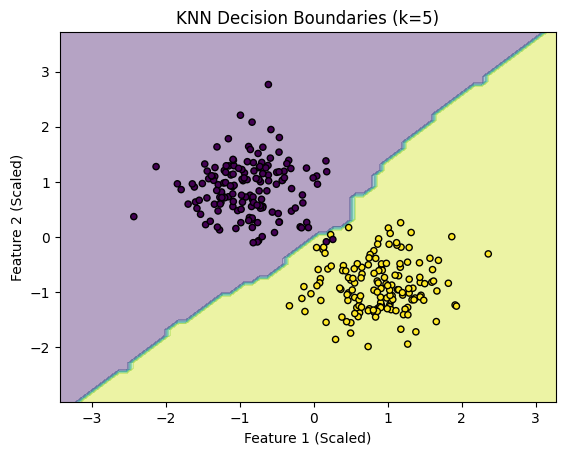

In [35]:
# Create a mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each mesh point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=20, edgecolor='k', cmap='viridis')
plt.title("KNN Decision Boundaries (k=5)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()

# Pros and Cons of Lazy Learning

**Advantages:**
* No training time (just stores data).

* Adapts immediately to new data.

* Simple to implement.

**Disadvantages:**

* High memory usage (stores all data).

* Slow prediction for large datasets.

* Sensitive to irrelevant features.

*Note: KNN’s "laziness" makes it flexible but computationally expensive. It’s ideal for small to medium datasets where interpretability and simplicity are prioritized over speed.*